# Laboratorio 1#
## Exploración de datos

En este laboratorio realizaremos un trabajo de exploración sobre un dataset dado. Hemos tomado como inspiración el siguiente kernel de Kaggle: We are from our childhood. El conjunto de datos utilizado son las respuestas de gente joven a una encuesta, con la que les proponemos trabajar. En esta notebook en particular, la autora visualiza distintos aspectos de los datos tratando de encontrar factores de variación relacionados a la respuesta “Crecí en la ciudad” o “Crecí en el campo”. La consigna para este laboratorio es realizar un trabajo similar, aunque más simple, analizando algunas de las variables de la encuesta.


## Entrega

En el repositorio de su grupo deben subir una notebook (recomendamos usar jupyter) con el código y las visualizaciones utilizadas para extraer la información que les pedimos a continuación. Si la notebook no la presentan en un github, suban también un archivo html para que podamos ver las imágenes sin necesidad de ejecutar el código. Recuerden que entre las celdas de código puede agregar markdown y latex para explicar las hipótesis que plantean y conclusiones que obtienen.

El informe sólo es necesario para aclarar decisiones de diseño que hayan tomado, librerías extras utilizadas, etc.
Implementación
Se deberá presentar al menos la siguiente información:

Estadísticas descriptivas
1) Calcular estadísticos como la moda, media, mediana y  desviación estándar del peso y de la edad </span>. ¿Responden a alguna distribución conocida?

2) Realizar un  análisis de outliers.

3) Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

4) <span style="color:red">Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

5) <span style="color:red">Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.
6) Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?</span>.

Se evaluarán los siguientes aspectos:
Estructura legible de la notebook.
Los tipos de gráficos son adecuados para la información representada
Otros datasets para inspirarse.

En el portal de datos abiertos de Argentina pueden encontrar datasets, la mayoría de ellos sobre agricultura. En particular encontramos datos sobre femicidios en Argentina, similar al que trabajaremos en clase de violencia institucional.

En GapMinder existe una colección de datasets que describen World wide wellfare variables.

En el github Fivethirtyeight datasets hay una colección de datos utilizados para crear reportes periodísticos con alto contenido de estadística. Entre los destacados: 
Comic characters.
Fandango.
Nutrition
Star wars
En Kaggle también existen muchas opciones de datasets y código para trabajarlos.


In [25]:
#Importamos las librerías
%matplotlib inline
import itertools
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style("whitegrid")
sns.set_context("talk")


In [2]:
# Importamos el dataset con el cual trabajaremos.
dataset = pandas.read_csv("Documents/responses.csv",
                          encoding='utf8')

In [24]:
#Vamos a usar .describe() para mostrar algunos estadísticos aunque la moda no. Luego volveremos a calcularlos
dataset[['Age', 'Weight']].dropna().describe()

,Age,Weight
count,987.000000,987.000000
mean,20.437690,66.426545
std,2.839328,13.850382
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000



    Media_Weight: 66
    Mediana_Weight: 64
    Moda_Weight: 60
    Variacion_Weight: 13



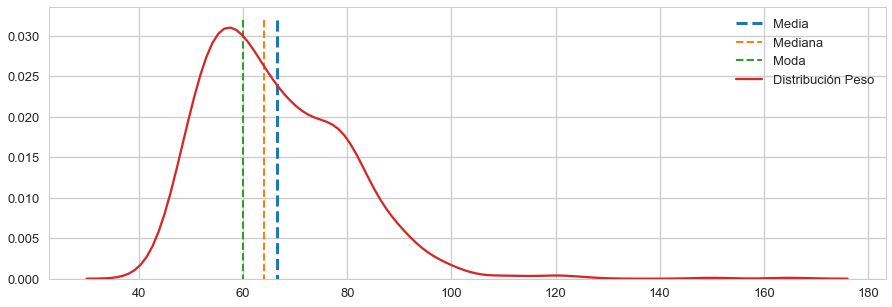

In [6]:
#Calculamos la media, moda, mediana de los valores Peso y Edad
#Graficamos los estadísticos.

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
media_peso = dataset['Weight'].mean()
mediana_peso = dataset['Weight'].median()
moda_peso = dataset['Weight'].mode()
variacion_peso = dataset['Weight'].std()
plt.plot([media_peso, media_peso], [0.032, 0], linewidth=3, linestyle ='dashed', label = 'Media')
plt.plot([mediana_peso, mediana_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Mediana')
plt.plot([moda_peso, moda_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Moda')
#plt.plot([variacion_peso, variacion_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'variacion Estandar')
sns.kdeplot(dataset['Weight'].dropna(),label ='Distribución Peso')

print("""
    Media_Weight: %d
    Mediana_Weight: %d
    Moda_Weight: %d
    Variacion_Weight: %d
""" % (media_peso,mediana_peso,moda_peso, variacion_peso))





Vemos que tanto la mediana como la media están a la derecha de la moda (el valor más frecuente). Entonces podemos decir que es una distribución asimétrica a la derecha.


    Media_Age: 20
    Mediana__Age: 20
    Moda__Age: 19
    Variacion__Age: 2



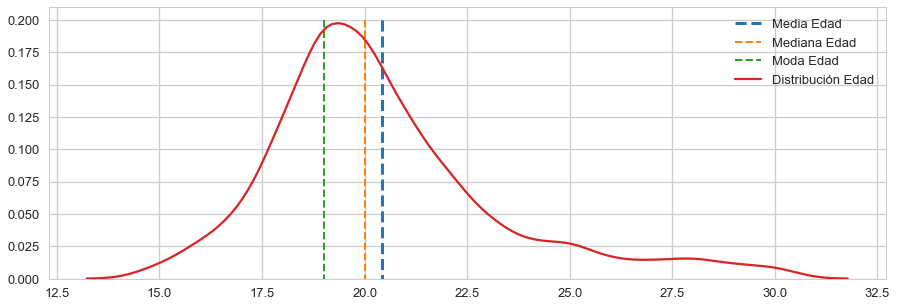

In [10]:
#Sacamos estadísticos de Edad y los graficamos

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
media_age = dataset['Age'].mean()
mediana_age = dataset['Age'].median()
moda_age = dataset['Age'].mode()
variacion_age = dataset['Age'].std()
plt.plot([media_age, media_age], [0.2, 0], linewidth=3, linestyle ='dashed', label = 'Media Edad')
plt.plot([mediana_age, mediana_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Mediana Edad')
plt.plot([moda_age, moda_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Moda Edad')
#plt.plot([variacion_peso, variacion_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'variacion Estandar')
sns.kdeplot(dataset['Age'].dropna(),label ='Distribución Edad')

print("""
    Media_Age: %d
    Mediana__Age: %d
    Moda__Age: %d
    Variacion__Age: %d
""" % (media_age,mediana_age,moda_age, variacion_age))


Outliers Edad


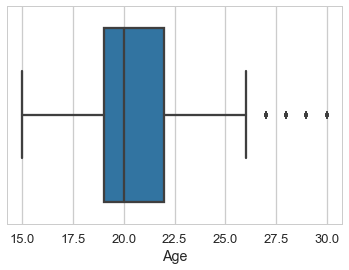

In [12]:
#Graficamos los outliers de Edad
print ('Outliers Edad')
sns.boxplot(dataset['Age'].dropna())
plt.show()


Outliers Peso


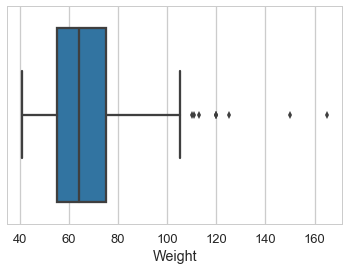

In [15]:
#Graficamos los outliers de Peso
print ('Outliers Peso')
sns.boxplot(dataset['Weight'].dropna())
plt.show()


 ## 3) Análisis sobre los outliers
DS = Desviación estandard

Variable Peso, los outliers representan a las personas con sobrepeso (por encima de las 108 Kg) y del total de la muestra, de 990 entradas, estas representan ~1% del total (9 registros). No existen outliers por debajo de la media ya que el registro mínimo registrado es de 41 Kg

Variable Edad, los outliers representan a las personas estrictamente mayores a los 26 años. Dado que la media para esta variable es de 20,434 y la desviación estandard es de 2.83. Las edades que sobrepasen los 26 (2 veces la DS sobre la media) son considerados outliers. El dato mínimo registrado es el de una persona de 15 años, al estar dentro del rango de 2 DS, no se considera outlier.

En general los valores outliers sugieren que los datos pueden pertenecer a una población diferente del resto de las muestras. Las estadísticas descriptivas derivadas de esto pueden ser engañosas si consideramos a la media. En ese caso la mediana puede resultar de más utilidad.



Distribucion de Peso por género


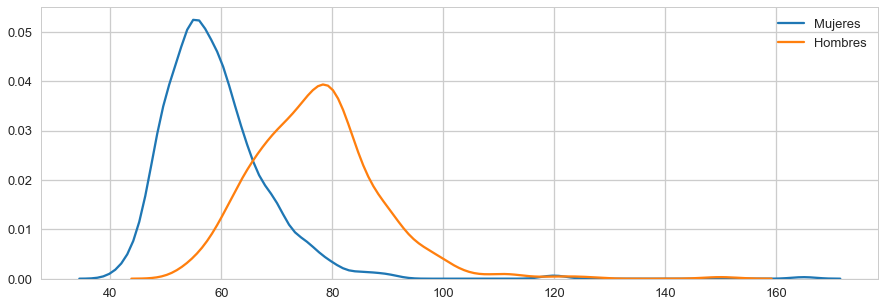

In [23]:
#Desglosamos la variable peso por género

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
#plt.plot([media_peso, media_peso], [0.05, 0], linewidth=2, linestyle ='dashed', label = 'Media')
sns.kdeplot(dataset[dataset['Gender']=='female'].Weight.dropna(), label = "Mujeres")
sns.kdeplot(dataset[dataset['Gender']=='male'].Weight.dropna() , label = "Hombres" )
print ("Distribucion de Peso por género")



Distribucion de Edad por género


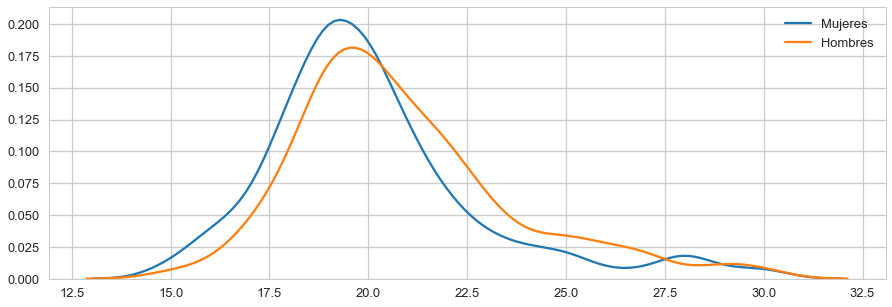

In [21]:
#Desglosamos la variable edad por género

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.kdeplot(dataset[dataset['Gender']=='female'].Age.dropna(), label = "Mujeres" )
sns.kdeplot(dataset[dataset['Gender']=='male'].Age.dropna(), label = "Hombres")
print ("Distribucion de Edad por género")

In [ ]:
Para observar la correlación entre

In [35]:
#Get means for the whole dataset and fill nan with means
hombres_pearsonr = stats.pearsonr(
dataset[dataset['Gender']=='male'].Age.fillna(media_age),
dataset[dataset['Gender']=='male'].Weight.fillna(media_peso)  
)
print (hombres_pearsonr[0])
mujeres_pearsonr = stats.pearsonr(
dataset[dataset['Gender']=='female'].Age.fillna(media_age),
dataset[dataset['Gender']=='female'].Weight.fillna(media_peso)  
)
print (mujeres_pearsonr[0])



# Remove any rows with Gender as 'nan' and any row with Age AND Weight as 'nan'
young_with_means = dataset[['Age', 'Weight', 'Gender']].dropna(axis=0, subset=['Gender']).dropna(thresh=2)

# Get means for males and fill nans with it
male = young_with_means[young_with_means.Gender == 'male']
male_means = male.mean(axis=0)
male = male.fillna(male_means)

# Get means for females and fill nans with it
female = young_with_means[young_with_means.Gender == 'female']
female_means = male.mean(axis=0)
female = female.fillna(male_means)

# Get pearson
male_pearsonr = stats.pearsonr(
    male.Age,
    male.Weight
)

female_pearsonr = stats.pearsonr(
    female.Age,
    female.Weight
)

print('\t #Pearson Male r: {0}, Female r: {1}'.format(male_pearsonr[0], female_pearsonr[0]))

0.250257637107
0.152578672662
	 #Pearson Male r: 0.2532522752495907, Female r: 0.14569046513663586
